<a href="https://colab.research.google.com/github/beatricexc/Insurance-Price-Prediction-with-Multiple-Linear-Regression/blob/main/InsurPricePredipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('/content/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
#checking and converting variables to categories
print("sex")
print(*list(data.sex.unique()))
print("smoker")
print(*list(data.smoker.unique()))
print("region")
print(*list(data.region.unique()))

sex
female male
smoker
yes no
region
southwest southeast northwest northeast


In [11]:
data["sex"]= data["sex"].astype("category")
data["smoker"] = data["smoker"].astype("category")
data["region"] = data["region"].astype("category")

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   expenses  1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


In [13]:
#checking for missing values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [14]:
data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


Preprocessing the data : splitting dependent from independent variables, encode the data and scaling

In [15]:
x = data.iloc[:, 0:6]
y = data.iloc[:, -1]

In [16]:
x

,age,sex,bmi,children,smoker,region
0,19,female,27.9,0,yes,southwest
1,18,male,33.8,1,no,southeast
2,28,male,33.0,3,no,southeast
3,33,male,22.7,0,no,northwest
4,32,male,28.9,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest
1334,18,female,31.9,0,no,northeast
1335,18,female,36.9,0,no,southeast
1336,21,female,25.8,0,no,southwest


## One Hot Encoding 

- converting cat var to binary vectors 
- allows nominal values to be turned into numerical values with not ordinal relationship between the classes

In [17]:
from sklearn.preprocessing import OneHotEncoder 

# selected variables are : sex, regions, smoker
encoded_data = pd.get_dummies(x, columns =['sex', 'region','smoker'])
encoded_data.head()

,age,bmi,children,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes
0,19,27.9,0,1,0,0,0,0,1,0,1
1,18,33.8,1,0,1,0,0,1,0,1,0
2,28,33.0,3,0,1,0,0,1,0,1,0
3,33,22.7,0,0,1,0,1,0,0,1,0
4,32,28.9,0,0,1,0,1,0,0,1,0


In [18]:
# Scaling all vars from 0 to 1

from sklearn.preprocessing import MinMaxScaler
features = encoded_data.columns.values
scaler = MinMaxScaler(feature_range =(0,1))
scaler.fit(encoded_data)
x = pd.DataFrame(scaler.transform(encoded_data))
x.columns = features


In [19]:
x

,age,bmi,children,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes
0,0.021739,0.320755,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.000000,0.479784,0.2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.217391,0.458221,0.6,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.326087,0.180593,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.304348,0.347709,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,0.404313,0.6,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1334,0.000000,0.428571,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1335,0.000000,0.563342,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1336,0.065217,0.264151,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [21]:
# split between test and train

from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.80, random_state = 1)

In [23]:
x_train

,age,bmi,children,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes
216,0.760870,0.285714,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
731,0.760870,0.145553,0.2,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
866,0.000000,0.574124,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
202,0.913043,0.215633,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
820,0.586957,0.477089,0.2,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
715,0.913043,0.347709,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
905,0.173913,0.361186,0.4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1096,0.717391,0.512129,0.4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
235,0.478261,0.167116,0.4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [26]:
# model dev

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

root mean squared = square root of the avg diff between the target value and the value predicted by the model

Widey preferred because the errors are first squared before averaging which poses high penalty on large errors ==> RMSE highly useful when errors are not wanted

In [27]:
y_pred = model.predict(x_test)

In [30]:
# printing model performance

print('Coefficient' , model.coef_)
print('Intercept: ', model.intercept_)
print('Mean squared error(MSE): %.2f'
     % mean_squared_error(y_test, y_pred))    
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred))

Coefficient [ 11843.43322142  11936.22649201   2040.5038795     121.01595722
   -121.01595722    584.16118346    188.49623764   -454.77826676
   -317.87915434 -11892.93545378  11892.93545378]
Intercept:  9668.847735614738
Mean squared error(MSE): 35478025.80
Coefficient of determination (R^2): 0.76


In [33]:
pd.DataFrame(model.coef_, x.columns, columns =["Coeff"])

,Coeff
age,11843.433221
bmi,11936.226492
children,2040.503880
sex_female,121.015957
sex_male,-121.015957
region_northeast,584.161183
region_northwest,188.496238
region_southeast,-454.778267
region_southwest,-317.879154
smoker_no,-11892.935454


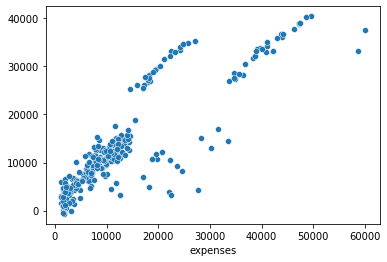

In [34]:
sns.scatterplot(y_test, y_pred)